In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Ishan\OneDrive\Desktop\IshaniPlacementPrepdocs\SolarEnergy_Project\data\Processed\cleaned_solar_data.csv")
df.head()


,date_time,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,plant_id_y,source_key_y,ambient_temperature,module_temperature,irradiation,hour,day,month
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

In [6]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Ishan\OneDrive\Desktop\IshaniPlacementPrepdocs\SolarEnergy_Project\data\Processed\cleaned_solar_data.csv")
df.head()


,date_time,plant_id_x,source_key_x,dc_power,ac_power,daily_yield,total_yield,plant_id_y,source_key_y,ambient_temperature,module_temperature,irradiation,hour,day,month
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,0.32219,0.099506,0.0,0.0,0.466667,0.0


In [9]:

df['date_time'] = pd.to_datetime(df['date_time'])

# extract temporal features
df['hour'] = df['date_time'].dt.hour
df['dayofyear'] = df['date_time'].dt.dayofyear
df['month'] = df['date_time'].dt.month

df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

features = [
    "ambient_temperature",
    "module_temperature",
    "irradiation",
    "hour",
    "dayofyear",
    "month",
    "sin_hour",
    "cos_hour"
]

target = "ac_power"
X = df[features]
y = df[target]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5

print("Random Forest R²:", round(rf_r2, 4))
print("Random Forest RMSE:", round(rf_rmse, 4))


Random Forest R²: 0.9777
Random Forest RMSE: 54.604


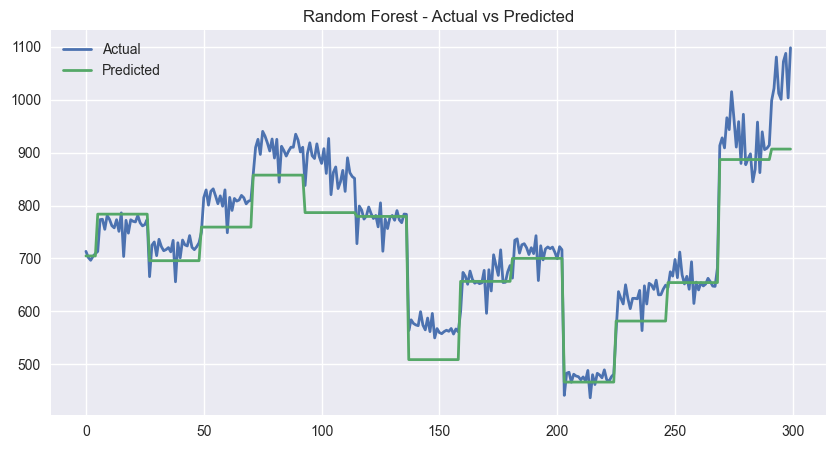

In [14]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:300], label="Actual", linewidth=2)
plt.plot(rf_pred[:300], label="Predicted", linewidth=2)
plt.title("Random Forest - Actual vs Predicted")
plt.legend()
plt.show()

In [16]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred) ** 0.5

print("XGBoost R²:", round(xgb_r2, 4))
print("XGBoost RMSE:", round(xgb_rmse, 4))


XGBoost R²: 0.9785
XGBoost RMSE: 53.6865


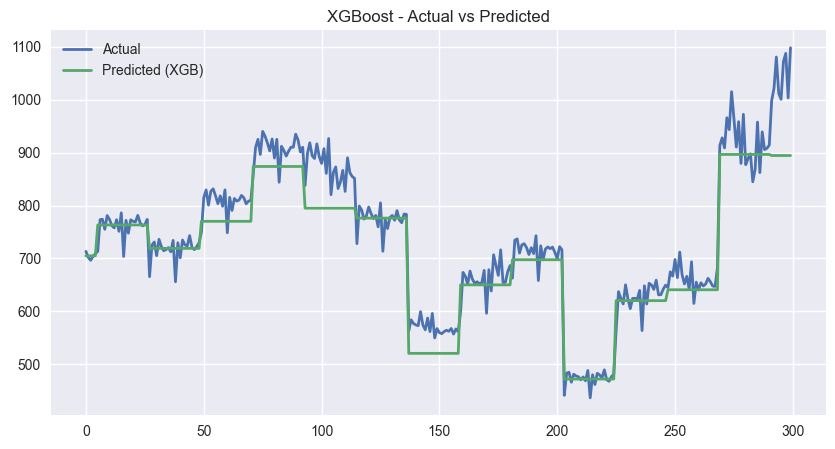

In [17]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:300], label="Actual", linewidth=2)
plt.plot(xgb_pred[:300], label="Predicted (XGB)", linewidth=2)
plt.title("XGBoost - Actual vs Predicted")
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf

X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(1, X_train.shape[1])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

lstm_pred = lstm_model.predict(X_test_lstm).flatten()

lstm_r2 = r2_score(y_test, lstm_pred)

lstm_rmse = mean_squared_error(y_test, lstm_pred) ** 0.5

print("LSTM R²:", round(lstm_r2, 4))
print("LSTM RMSE:", round(lstm_rmse, 4))


Epoch 1/10


c:\Users\Ishan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1720/1720 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 77983.6484
Epoch 2/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3896.9194
Epoch 3/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3050.6870
Epoch 4/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2913.5549
Epoch 5/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2868.5166
Epoch 6/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2837.8997
Epoch 7/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2812.0554
Epoch 8/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2791.8809
Epoch 9/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2778.0930
Epoch 10/10
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2769.2205
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
LSTM R²: 0.9796
LSTM RMSE: 52.2758


In [23]:
print("MODEL PERFORMANCE COMPARISON")
print("-------------------------------------")
print(f"Random Forest R²: {round(rf_r2,4)} | RMSE: {round(rf_rmse,4)}")
print(f"XGBoost R²:       {round(xgb_r2,4)} | RMSE: {round(xgb_rmse,4)}")
print(f"LSTM R²:          {round(lstm_r2,4)} | RMSE: {round(lstm_rmse,4)}")


MODEL PERFORMANCE COMPARISON
-------------------------------------
Random Forest R²: 0.9777 | RMSE: 54.604
XGBoost R²:       0.9785 | RMSE: 53.6865
LSTM R²:          0.9796 | RMSE: 52.2758


In [25]:
df.columns


Index(['date_time', 'plant_id_x', 'source_key_x', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield', 'plant_id_y', 'source_key_y',
       'ambient_temperature', 'module_temperature', 'irradiation', 'hour',
       'day', 'month', 'dayofyear', 'sin_hour', 'cos_hour'],
      dtype='object')

In [26]:
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

print(" cleaned dataset from current notebook")


features = [
    "ambient_temperature",
    "module_temperature",
    "irradiation",
    "hour",
    "dayofyear",
    "month",
    "sin_hour",
    "cos_hour"
]

target = "ac_power"

X = df[features]
y = df[target]

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# SCALING
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, "models/scaler.pkl")
print("📦 Saved: scaler.pkl")

# RANDOM FOREST
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, "models/rf_model.pkl")
print("🌲 Saved: rf_model.pkl")

# XGBOOST
xgb = XGBRegressor(n_estimators=600, learning_rate=0.05, max_depth=8, random_state=42)
xgb.fit(X_train, y_train)
joblib.dump(xgb, "models/xgb_model.pkl")
print("🚀 Saved: xgb_model.pkl")

# LSTM MODEL
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1])),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train_lstm, y_train, epochs=7, batch_size=32, verbose=1)

lstm.save("models/lstm_model.h5")
print("🧠 Saved: lstm_model.h5")

print("\n ALL MODELS TRAINED & SAVED SUCCESSFULLY ")


 cleaned dataset from current notebook


FileNotFoundError: [Errno 2] No such file or directory: 'models/scaler.pkl'

In [29]:
import os


os.makedirs("models", exist_ok=True)

print("models folder is ready.")

models folder is ready.


In [30]:
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

print(" cleaned dataset from current notebook")


features = [
    "ambient_temperature",
    "module_temperature",
    "irradiation",
    "hour",
    "dayofyear",
    "month",
    "sin_hour",
    "cos_hour"
]

target = "ac_power"

X = df[features]
y = df[target]

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# SCALING
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, "models/scaler.pkl")
print("📦 Saved: scaler.pkl")

# RANDOM FOREST
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, "models/rf_model.pkl")
print("🌲 Saved: rf_model.pkl")

# XGBOOST
xgb = XGBRegressor(n_estimators=600, learning_rate=0.05, max_depth=8, random_state=42)
xgb.fit(X_train, y_train)
joblib.dump(xgb, "models/xgb_model.pkl")
print("🚀 Saved: xgb_model.pkl")

# LSTM MODEL
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1])),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train_lstm, y_train, epochs=7, batch_size=32, verbose=1)

lstm.save("models/lstm_model.h5")
print("🧠 Saved: lstm_model.h5")

print("\n ALL MODELS TRAINED & SAVED SUCCESSFULLY ")


 cleaned dataset from current notebook
📦 Saved: scaler.pkl
🌲 Saved: rf_model.pkl
🚀 Saved: xgb_model.pkl
Epoch 1/7


c:\Users\Ishan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1720/1720 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 62562.3164
Epoch 2/7
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3553.7751
Epoch 3/7
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2991.2456
Epoch 4/7
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2896.1274
Epoch 5/7
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2849.6746
Epoch 6/7
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2816.7695
Epoch 7/7
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2800.0090


🧠 Saved: lstm_model.h5

 ALL MODELS TRAINED & SAVED SUCCESSFULLY 


In [31]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Complete the notebook with proper error handling\n",
    "\n",
    "# Metrics Comparison Table\n",
    "print(\"\\n\" + \"=\"*50)\n",
    "print(\"MODEL PERFORMANCE SUMMARY\")\n",
    "print(\"=\"*50)\n",
    "\n",
    "metrics_df = pd.DataFrame([rf_metrics])\n",
    "metrics_df.index = ['Random Forest']\n",
    "\n",
    "if xgb_model is not None:\n",
    "    xgb_df = pd.DataFrame([xgb_metrics])\n",
    "    xgb_df.index = ['XGBoost']\n",
    "    metrics_df = pd.concat([metrics_df, xgb_df])\n",
    "\n",
    "display(metrics_df.style.format('{:.4f}').background_gradient(cmap='Blues'))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Save models for webapp use (optional)\n",
    "print(\"\\nSaving models for webapp...\")\n",
    "models_dir = Path('..') / 'models'\n",
    "models_dir.mkdir(exist_ok=True)\n",
    "\n",
    "import joblib\n",
    "\n",
    "# Save scaler\n",
    "joblib.dump(scaler, models_dir / 'scaler.pkl')\n",
    "print(\"✓ Scaler saved\")\n",
    "\n",
    "# Save Random Forest\n",
    "joblib.dump(rf_model, models_dir / 'rf_model.pkl')\n",
    "print(\"✓ Random Forest model saved\")\n",
    "\n",
    "# Save XGBoost if available\n",
    "if xgb_model is not None:\n",
    "    joblib.dump(xgb_model, models_dir / 'xgb_model.pkl')\n",
    "    print(\"✓ XGBoost model saved\")\n",
    "\n",
    "# Save metrics\n",
    "metrics_data = {'random_forest': rf_metrics}\n",
    "if xgb_model is not None:\n",
    "    metrics_data['xgboost'] = xgb_metrics\n",
    "\n",
    "with open(models_dir / 'metrics.json', 'w') as f:\n",
    "    json.dump(metrics_data, f, indent=2)\n",
    "print(\"✓ Metrics saved\")\n",
    "\n",
    "print(\"\\n✅ All models and artifacts saved successfully!\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Next Steps\n",
    "\n",
    "1. **Run the Flask app**: \n",
    "   ```bash\n",
    "   cd webapp\n",
    "   python app.py\n",
    "   ```\n",
    "\n",
    "2. **Access the dashboard**: Open http://127.0.0.1:5000\n",
    "\n",
    "3. **Make predictions**: Use the form to predict AC Power based on input features"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.13"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}

NameError: name 'null' is not defined